In [1]:
# @title load the package
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from datetime import datetime
import numpy as np
from google.colab import files
import numpy as np
import scipy.optimize as opt
import itertools
from multiprocessing import Pool
from tqdm import tqdm

Mounted at /content/drive


In [ ]:
# @title read fundamental data
import zipfile
import pandas as pd



# 打开zip文件
with zipfile.ZipFile('/content/drive/My Drive/WRDS/Fundamentals Annual (1).zip', 'r') as zip_ref:
    # 列出zip文件内的文件
    file_list = zip_ref.namelist()

    # 假设我们知道zip文件内有一个csv文件叫做data.csv
    with zip_ref.open('Fundamentals Annual.csv') as csv_file:
        # 读取csv文件到pandas dataframe
        df = pd.read_csv(csv_file)

<ipython-input-4-37c2ada826bc>:15: DtypeWarning: Columns (8,10,12,26,30,33,34,35,945,946,948,949,950,955,965,969,970,975,980) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


In [ ]:
# @title read the return data RET
Stock_Index=pd.read_csv('/content/drive/My Drive/Colab Notebooks/cik_sp500.csv')
s=Stock_Index.values.tolist()
factor=pd.read_csv('/content/drive/My Drive/Colab Notebooks/5_factor_2007-2017.csv')
indicator=pd.read_csv('/content/drive/My Drive/Colab Notebooks/indicator.csv')

## Prepare the data
I=indicator[indicator['PERMNO'].isin(Stock_Index['permno'])]
Stock_Index=Stock_Index.rename(columns={"permno":"PERMNO"})
R=pd.merge(I[['PERMNO','RET','date', 'VOL', 'SHROUT', 'TICKER', 'PRC']],Stock_Index[['CIK_sp500','PERMNO']],how='left',on='PERMNO')
factor=factor.rename(columns={"dateff":"date"})
R=pd.merge(R[['PERMNO','RET','date','CIK_sp500', 'VOL', 'SHROUT', 'TICKER', 'PRC']],factor[['date','RF']],how='left',on='date')
R=R[R['RET']!='B']
R=R[R['RET']!='C']
R=R.dropna(subset=['RET'])
industry_list = pd.read_csv('/content/drive/My Drive/Colab Notebooks/industry list_0810.csv')
Stock_permno = pd.read_csv('/content/drive/My Drive/Colab Notebooks/S&P500constitute.csv')

linktable = pd.read_csv('/content/drive/My Drive/ccmxpf_linktable.csv')

<ipython-input-5-2faeec66e67d>:5: DtypeWarning: Columns (26,51,60) have mixed types. Specify dtype option on import or set low_memory=False.
  indicator=pd.read_csv('/content/drive/My Drive/Colab Notebooks/indicator.csv')


In [ ]:
linktable[linktable['lpermno'] == 14593]

,gvkey,linkprim,liid,linktype,lpermno,lpermco,usedflag,linkdt,linkenddt
1694,1690,P,01,LU,14593.0,7.0,1.0,1980-12-12,NaN


In [ ]:
Stock_permno[Stock_permno['CIK'] == 320193]

,PERMNO,start,ending,CIK
187,14593,19821118,20211231,320193


In [ ]:
file_path = '/content/drive/MyDrive/WRDS/apple_data.csv'
apple_data.to_csv(file_path, index=False)

In [2]:
import pandas as pd

# 读取CSV文件
file_path = '/content/drive/MyDrive/WRDS/apple_data.csv'
apple_data = pd.read_csv(file_path)

In [ ]:
apple_data.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,...,priusa,sic,spcindcd,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate
0,1690,1980-09-30,1980.0,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,1.0,3663,190.0,940.0,A+,CA,0.0,www.apple.com,NaN,1980-12-12
1,1690,1981-09-30,1981.0,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,1.0,3663,190.0,940.0,A+,CA,0.0,www.apple.com,NaN,1980-12-12
2,1690,1982-09-30,1982.0,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,1.0,3663,190.0,940.0,A+,CA,0.0,www.apple.com,NaN,1980-12-12
3,1690,1983-09-30,1983.0,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,1.0,3663,190.0,940.0,A+,CA,0.0,www.apple.com,NaN,1980-12-12
4,1690,1984-09-30,1984.0,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,1.0,3663,190.0,940.0,A+,CA,0.0,www.apple.com,NaN,1980-12-12


In [3]:
df = apple_data[['seq', 'dltt', 'che', 'niint', 'ivst', 'dt', 'ebitda', 'dpc', 'xint', 'datadate']]

In [4]:
df['Equity investment'] = df['seq']

df['Long term'] = df['dltt']

df['Minimum cash required'] = df['che']

df['Return of short term investment'] = df['xint'] / df['ivst']

df['Cost of debt'] = df['xint'] / df['dt']

df['EBITDA'] = df['ebitda']

df['EBIT'] = df['ebitda'] - df['dt']

df['Depreciation'] = df['dt']

<ipython-input-4-58d1040e260a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Equity investment'] = df['seq']
<ipython-input-4-58d1040e260a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Long term'] = df['dltt']
<ipython-input-4-58d1040e260a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [5]:
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

In [6]:
np.random.seed(42)
df.set_index('datadate', inplace=True)


In [12]:
name = ['Equity investment', 'Long term', 'Minimum cash', 'Return of short term investment', 'Cost of debt', 'EBIT', 'Depreciation', 'EBITDA', 'Net fixed assets']

input = pd.DataFrame(np.zeros((len(name), 3)), columns=['D', 'E', 'F'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-SEP will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


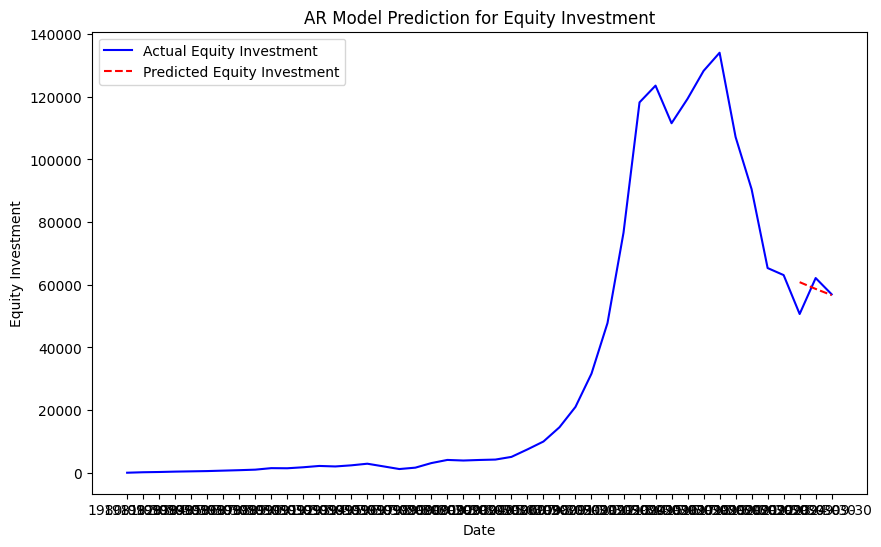

In [7]:
# @title Equity investment
equity_data = df['Equity investment']

train_size = int(len(equity_data) * 0.95)
train, test = equity_data[:train_size], equity_data[train_size:]

model = AutoReg(train, lags=2).fit()
predictions = model.predict(start=len(train), end=len(equity_data) - 1, dynamic=False)

plt.figure(figsize=(10, 6))
plt.plot(equity_data.index, equity_data, label='Actual Equity Investment', color='blue')
plt.plot(test.index, predictions, label='Predicted Equity Investment', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Equity Investment')
plt.title('AR Model Prediction for Equity Investment')
plt.legend()
plt.show()

In [8]:
predictions

,0
2022-09-30,60833.341267
2023-09-30,58679.113571
2024-09-30,56688.408327


In [13]:
input.index = name

In [17]:
input.loc['Equity investment', 'D'] = predictions[0]

<ipython-input-17-5e949c29af59>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  input.loc['Equity investment', 'D'] = predictions[0]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-SEP will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


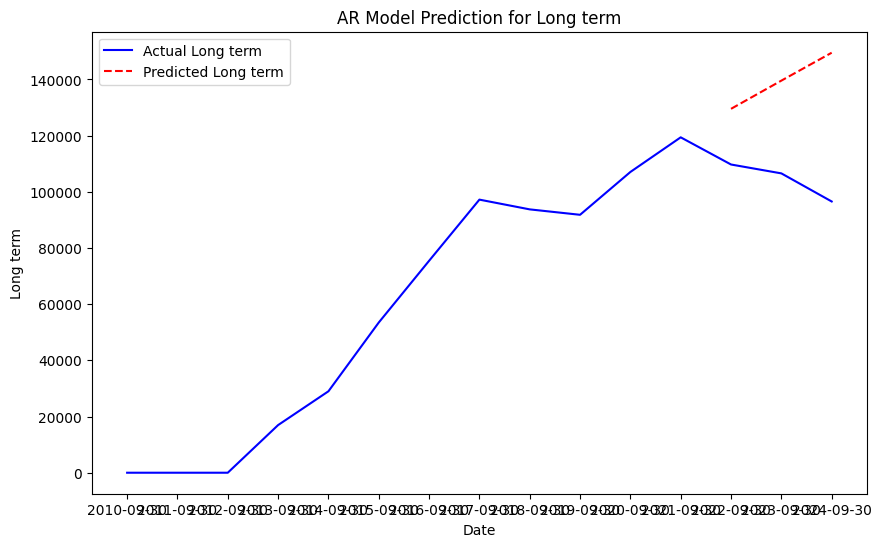

In [26]:
# @title Long term
data = df['Long term'][30: ]

train_size = int(len(data) * 0.85)
train, test = data[:train_size], data[train_size:]

model = AutoReg(train, lags= 1).fit()
predictions = model.predict(start=len(train), end=len(data) - 1, dynamic=False)

plt.figure(figsize=(10, 6))
plt.plot(data.index, data, label='Actual Long term', color='blue')
plt.plot(test.index, predictions, label='Predicted Long term', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Long term')
plt.title('AR Model Prediction for Long term')
plt.legend()
plt.show()

In [27]:
predictions

,0
2022-09-30,129524.487911
2023-09-30,139562.244369
2024-09-30,149495.371474


In [28]:
input.loc['Long term', 'D'] = predictions[0]

<ipython-input-28-d65d2036eb44>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  input.loc['Long term', 'D'] = predictions[0]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-SEP will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


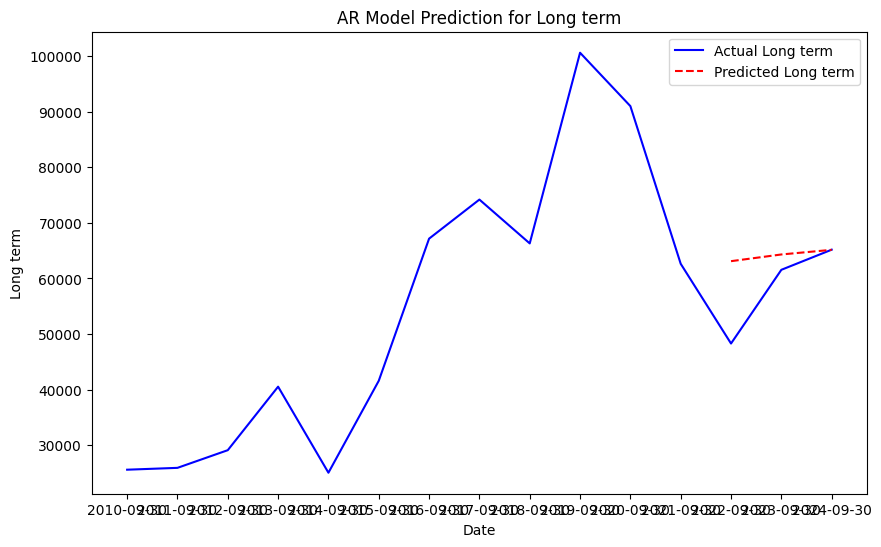

In [35]:
# @title Minimum cash required
data = df['Minimum cash required'][30: ]

train_size = int(len(data) * 0.85)
train, test = data[:train_size], data[train_size:]

model = AutoReg(train, lags=2).fit()
predictions = model.predict(start=len(train), end=len(data) - 1, dynamic=False)

plt.figure(figsize=(10, 6))
plt.plot(data.index, data, label='Actual Long term', color='blue')
plt.plot(test.index, predictions, label='Predicted Long term', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Long term')
plt.title('AR Model Prediction for Long term')
plt.legend()
plt.show()

In [38]:
predictions

,0
2022-09-30,63106.989862
2023-09-30,64312.025815
2024-09-30,65145.570833


In [37]:
input.loc['Minimum cash', 'D'] = predictions[0]

<ipython-input-37-2b7fe39f1298>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  input.loc['Minimum cash', 'D'] = predictions[0]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-SEP will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


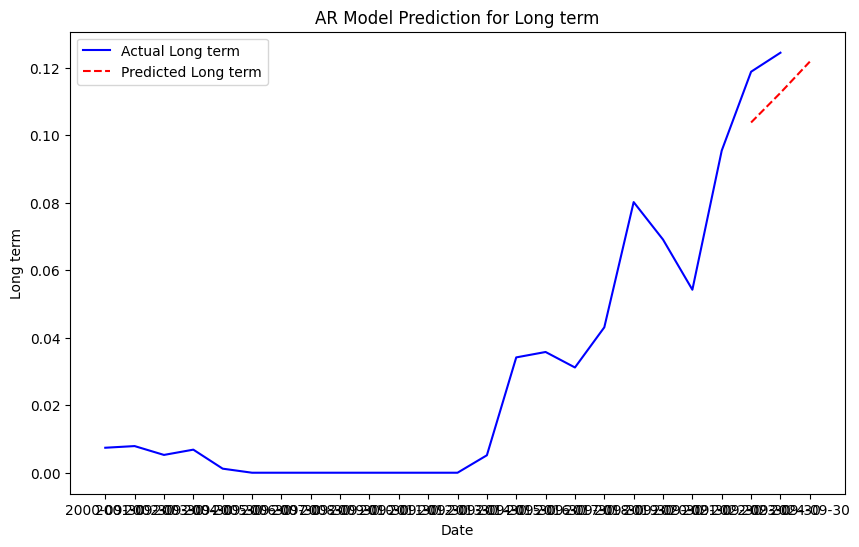

In [39]:
# @title Return of short term investment
data = df['Return of short term investment'][20:]

train_size = int(len(data) * 0.90)
train, test = data[:train_size], data[train_size:]

model = AutoReg(train, lags=1).fit()
predictions = model.predict(start=len(train), end=len(data) - 1, dynamic=False)

plt.figure(figsize=(10, 6))
plt.plot(data.index, data, label='Actual Long term', color='blue')
plt.plot(test.index, predictions, label='Predicted Long term', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Long term')
plt.title('AR Model Prediction for Long term')
plt.legend()
plt.show()

In [40]:
predictions

,0
2022-09-30,0.103824
2023-09-30,0.112604
2024-09-30,0.121854


In [41]:
input.loc['Return of short term investment', 'E'] = predictions[1]
input.loc['Return of short term investment', 'F'] = predictions[2]

<ipython-input-41-552a9b376bf3>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  input.loc['Return of short term investment', 'E'] = predictions[1]
<ipython-input-41-552a9b376bf3>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  input.loc['Return of short term investment', 'F'] = predictions[2]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-SEP will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


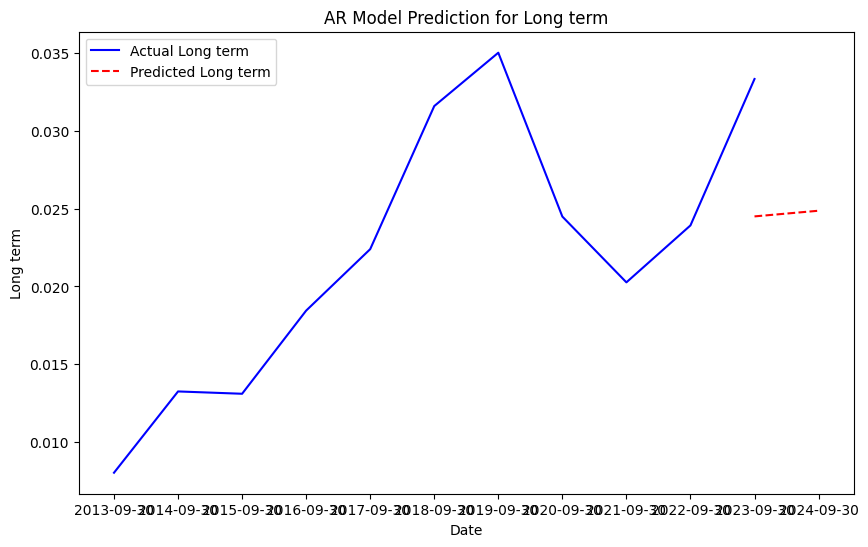

In [48]:
# @title Cost of debt
data = df['Cost of debt'][33:]

train_size = int(len(data) * 0.90)
train, test = data[:train_size], data[train_size:]

model = AutoReg(train, lags=1).fit()
predictions = model.predict(start=len(train), end=len(data) - 1, dynamic=False)

plt.figure(figsize=(10, 6))
plt.plot(data.index, data, label='Actual Long term', color='blue')
plt.plot(test.index, predictions, label='Predicted Long term', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Long term')
plt.title('AR Model Prediction for Long term')
plt.legend()
plt.show()

In [49]:
predictions

,0
2023-09-30,0.024507
2024-09-30,0.024872


In [50]:
input.loc['Cost of debt', 'E'] = predictions[0]
input.loc['Cost of debt', 'F'] = predictions[1]

<ipython-input-50-75aad2213119>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  input.loc['Cost of debt', 'E'] = predictions[0]
<ipython-input-50-75aad2213119>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  input.loc['Cost of debt', 'F'] = predictions[1]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-SEP will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


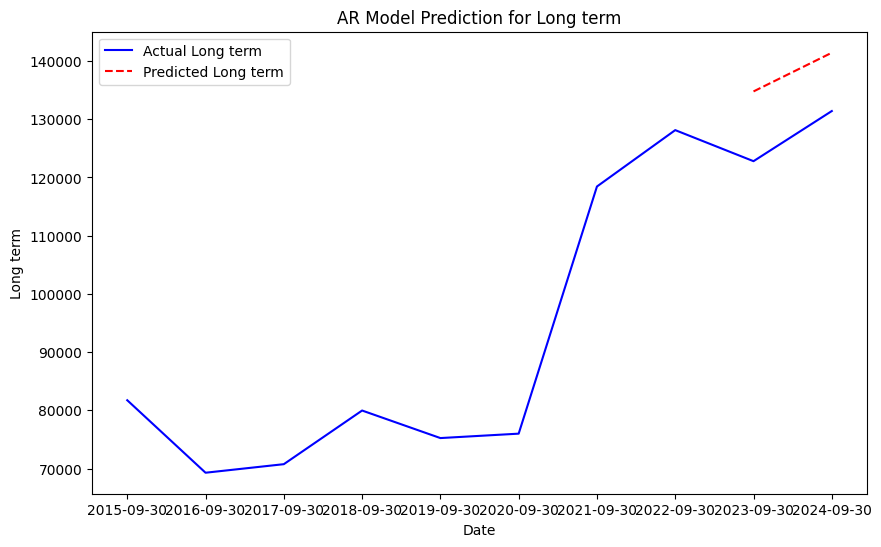

In [67]:
# @title EBITDA
data = df['EBITDA'][35:]

train_size = int(len(data) * 0.80)
train, test = data[:train_size], data[train_size:]

model = AutoReg(train, lags=1).fit()
predictions = model.predict(start=len(train), end=len(data) - 1, dynamic=False)

plt.figure(figsize=(10, 6))
plt.plot(data.index, data, label='Actual Long term', color='blue')
plt.plot(test.index, predictions, label='Predicted Long term', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Long term')
plt.title('AR Model Prediction for Long term')
plt.legend()
plt.show()

In [68]:
predictions

,0
2023-09-30,134784.510520
2024-09-30,141434.584932


In [69]:
input.loc['EBITDA', 'E'] = predictions[0]
input.loc['EBITDA', 'F'] = predictions[1]

<ipython-input-69-e04300e31a23>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  input.loc['EBITDA', 'E'] = predictions[0]
<ipython-input-69-e04300e31a23>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  input.loc['EBITDA', 'F'] = predictions[1]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-SEP will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


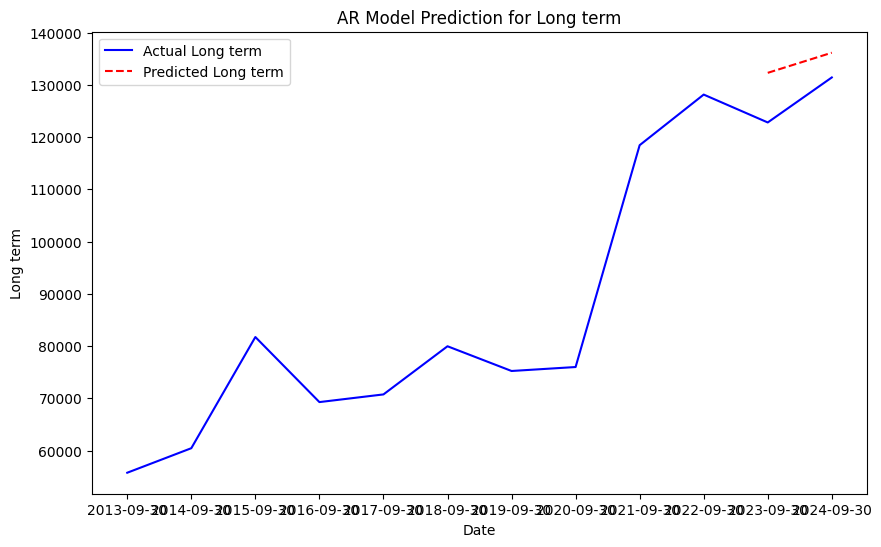

In [70]:
# @title EBIT
data = df['EBITDA'][33:]

train_size = int(len(data) * 0.90)
train, test = data[:train_size], data[train_size:]

model = AutoReg(train, lags=1).fit()
predictions = model.predict(start=len(train), end=len(data) - 1, dynamic=False)

plt.figure(figsize=(10, 6))
plt.plot(data.index, data, label='Actual Long term', color='blue')
plt.plot(test.index, predictions, label='Predicted Long term', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Long term')
plt.title('AR Model Prediction for Long term')
plt.legend()
plt.show()

In [71]:
predictions

,0
2023-09-30,132299.139586
2024-09-30,136149.135965


In [72]:
input.loc['EBIT', 'E'] = predictions[0]
input.loc['EBIT', 'F'] = predictions[1]

<ipython-input-72-0b062634aaf6>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  input.loc['EBIT', 'E'] = predictions[0]
<ipython-input-72-0b062634aaf6>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  input.loc['EBIT', 'F'] = predictions[1]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-SEP will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


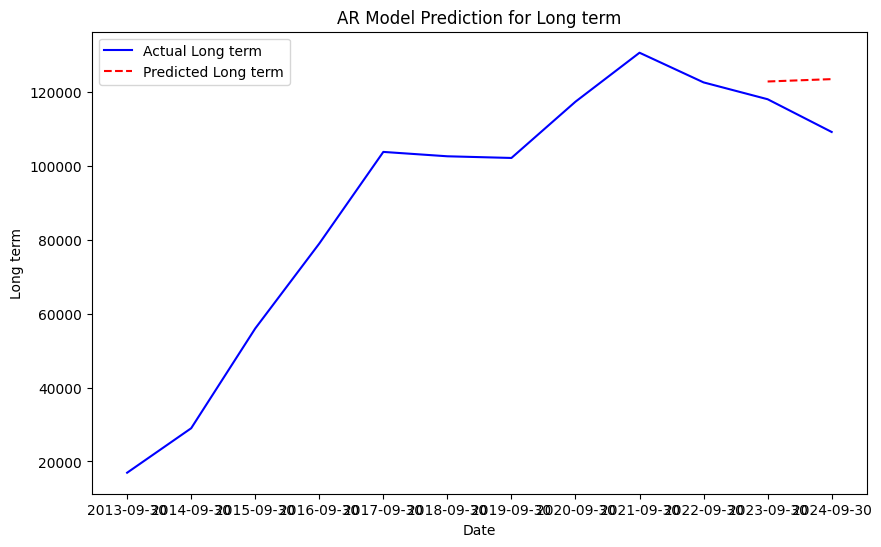

In [73]:
# @title Depreciation
data = df['Depreciation'][33:]

train_size = int(len(data) * 0.90)
train, test = data[:train_size], data[train_size:]

model = AutoReg(train, lags=2).fit()
predictions = model.predict(start=len(train), end=len(data) - 1, dynamic=False)

plt.figure(figsize=(10, 6))
plt.plot(data.index, data, label='Actual Long term', color='blue')
plt.plot(test.index, predictions, label='Predicted Long term', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Long term')
plt.title('AR Model Prediction for Long term')
plt.legend()
plt.show()

In [74]:
predictions

,0
2023-09-30,122743.344503
2024-09-30,123383.091629


In [75]:
input.loc['Depreciation', 'E'] = predictions[0]
input.loc['Depreciation', 'F'] = predictions[1]

<ipython-input-75-28263a4ae33c>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  input.loc['Depreciation', 'E'] = predictions[0]
<ipython-input-75-28263a4ae33c>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  input.loc['Depreciation', 'F'] = predictions[1]


In [78]:
input.loc['EBITDA', 'E'] = input.loc['EBIT', 'E'] + input.loc['Depreciation', 'E']
input.loc['EBITDA', 'F'] = input.loc['EBIT', 'F'] + input.loc['Depreciation', 'F']

In [76]:
input.loc['Net fixed assets', 'D'] = input.loc['Equity investment', 'D'] + input.loc['Long term', 'D'] + input.loc['Minimum cash', 'D']

In [79]:
input.loc['Net fixed assets', 'E'] = input.loc['Net fixed assets', 'D'] - input.loc['EBITDA', 'E']
input.loc['Net fixed assets', 'F'] = input.loc['Net fixed assets', 'E'] - input.loc['EBITDA', 'F']

In [82]:
input.index = [5, 6, 9, 10, 11, 12, 13, 14, 15]

In [88]:
input

,D,E,F
5,60833.341267,0.000000,0.000000
6,129524.487911,0.000000,0.000000
9,63106.989862,0.000000,0.000000
10,0.000000,0.112604,0.121854
11,0.000000,0.024507,0.024872
12,0.000000,132299.139586,136149.135965
13,0.000000,122743.344503,123383.091629
14,0.000000,255042.484088,259532.227594
15,253464.819040,-1577.665048,-261109.892642


In [110]:
Cash_budget = pd.DataFrame(np.zeros((19, 3)), columns=['D', 'E', 'F'])
Cash_budget.index = [19, 21, 22, 23, 26, 27, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47]

In [97]:
Cash_budget.loc[21, 'D'] = input.loc[15, 'D']
Cash_budget.loc[22, 'D'] = -Cash_budget.loc[21, 'D']
Cash_budget.loc[23, 'D'] = Cash_budget.loc[22, 'D'] + Cash_budget.loc[19, 'D']


In [103]:
result = 0 if (Cash_budget.loc[19, 'D'] - input.loc[9, 'D']) > 0 else -(Cash_budget.loc[19, 'D'] - input.loc[9, 'D'])
Cash_budget.loc[26, 'D'] = result
Cash_budget.loc[36, 'D'] = input.loc[5, 'D']

result = -(Cash_budget.loc[22, 'D'] + Cash_budget.loc[36, 'D']) if -(Cash_budget.loc[22, 'D'] + Cash_budget.loc[36, 'D']) > 0 else 0
Cash_budget.loc[27, 'D'] = result

Cash_budget.loc[34, 'D'] = Cash_budget.loc[26, 'D'] + Cash_budget.loc[27, 'D'] - Cash_budget.loc[33, 'D']



In [105]:
Income_Statement  = pd.DataFrame(np.zeros((6, 3)), columns=['D', 'E', 'F'])
Income_Statement.index = [66, 67, 68, 69, 70, 71]

In [111]:
Cash_budget.loc[37, 'D'] = Income_Statement.loc[70, 'D']
Cash_budget.loc[38, 'D'] = Cash_budget.loc[36, 'D'] - Cash_budget.loc[37, 'D']
Cash_budget.loc[39, 'D'] = Cash_budget.loc[38, 'D'] + Cash_budget.loc[34, 'D'] + Cash_budget.loc[23, 'D']
Cash_budget.loc[44, 'D'] = Cash_budget.loc[47, 'D'] + Cash_budget.loc[39, 'D'] + Cash_budget.loc[43, 'D'] - input.loc[9, 'D']


In [112]:
Cash_budget.loc[44, 'D'] = Cash_budget.loc[47, 'D'] + Cash_budget.loc[39, 'D'] + Cash_budget.loc[43, 'D'] - input.loc[9, 'D']
Cash_budget.loc[45, 'D'] = Cash_budget.loc[43, 'D'] - Cash_budget.loc[44, 'D']
Cash_budget.loc[46, 'D'] = Cash_budget.loc[45, 'D'] + Cash_budget.loc[38, 'D'] + Cash_budget.loc[34, 'D'] + Cash_budget.loc[23, 'D']
Cash_budget.loc[47, 'D'] = Cash_budget.loc[46, 'D']
